# Pratiques d'écoutes musicales et omnivorisme culturel
Projet *Python pour la Data Science* de _Ribeiro Morgane_ et _Ley Juline_

### INTRODUCTION

« J’aime bien ‘Djadja’, j’aime bien ‘Doudou’, j’aime bien ‘SMS’, j’aime bien ‘Hypé’. » Lors d’une interview rendue publique en 2024, la ministre des Sports et des Jeux olympiques d'alors, Amélie Oudéa-Castéra, a déclaré apprécier plusieurs titres de la chanteuse Aya Nakamura. Cette déclaration, reprise par les médias et les réseaux sociaux, a suscité des réactions contrastées et met en lumière les tensions autour des représentations culturelles dans l’espace public. Au-delà de l’étonnement provoqué par cette séquence, celle-ci illustre la circulation croissante de pratiques culturelles autrefois associées à des registres distincts, sans pour autant effacer les différenciations sociales.

La généralisation des technologies a depuis quelques années profondément transformé les pratiques de consommation culturelle. L’accès dématérialisé aux œuvres s’est accompagné d’une diversification des pratiques, d’une intensification des usages et d’une redéfinition des cadres de légalité. 
La sociologie de la culture a documenté l’émergence d’un omnivorisme culturel, caractérisé par la coexistence de goûts variés au sein des classes supérieures. Toutefois, les travaux récents (P. Coulangeon, 2011) montrent que cette diversification ne signifie pas nécessairement la disparition des hiérarchies culturelles, mais plutôt une transformation de celles-ci. Dans un contexte numérique marqué par l’abondance de l’offre et la facilité d’accès, il devient alors pertinent de distinguer l’éclectisme des pratiques de leur intensité.
Ces évolutions interrogent la manière dont les hiérarchies culturelles se recomposent : la démocratisation de l’accès aux contenus conduit-elle à une homogénéisation des pratiques, ou les clivages sociaux continuent-ils de structurer les comportements culturels ?

Ce projet s’inscrit dans cette perspective en mobilisant des données issues du Baromètre "Consommation des contenus culturels et sportifs numériques" (Arcom, 2020) et d’une enquête sur les Pratiques d’écoute musicale (Arcom,2020). Notre objectif est d’analyser la diversité, la fréquence et la légalité des consommations culturelles dématérialisées afin de répondre à la question suivante : les classes supérieures sont-elles toujours omnivores, et selon quelles modalités ?
### SOMMAIRE 
* [Installation](#Install)

* [Préparation des données](#prepa)

* [Statistiques descriptives](#statdesc)

* [Analyse](#analyse)

* [Consommation et légalité](#legal)

* [Conclusion](#conclusion)


## Installation <a class="anchor" id="Install"></a>



In [1]:
!pip install -r requirements.txt --quiet

#Importations
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.pyplot as plt

import os
import seaborn as sns
from prince import MCA
from sklearn.cluster import KMeans
from plotnine import *
from scipy.stats import spearmanr
from scipy.stats import pearsonr

#Fonctions
from scripts import fonctions


## Préparation des données <a class="anchor" id="prepa"></a>

Les données utilisées sont également disponibles ici : 

Pratiques d'écoute de musique en ligne - 2020 : https://www.data.gouv.fr/datasets/pratiques-decoute-de-musique-en-ligne-2020 

Consommation des contenus culturels et sportifs numériques - Baromètre : https://www.data.gouv.fr/datasets/consommation-des-contenus-culturels-et-sportifs-numeriques-barometre


### 1. Adresses 

In [2]:
url_barometre = "https://www.data.gouv.fr/api/1/datasets/r/aff9d702-db6d-46e5-8416-c032d8b9d89d"

url_musique = "https://www.data.gouv.fr/api/1/datasets/r/85d1feb0-76cc-4e84-96f4-169971db952e"


### 2. Chargement des données

In [ ]:
fonctions.telecharger(url_barometre, "data_barometre.xlsx", "/home/onyxia/work/Projet_Python_pour_DS/data")
fonctions.telecharger(url_musique, "data_musique.xlsx", "/home/onyxia/work/Projet_Python_pour_DS/data")

df_barometre_brut = pd.read_excel("/home/onyxia/work/Projet_Python_pour_DS/data/data_barometre.xlsx")
df_musique_brut = pd.read_excel("/home/onyxia/work/Projet_Python_pour_DS/data/data_musique.xlsx")


Téléchargement réussi !
Téléchargement réussi !


### 3. Structure de la base de données - Baromètre


In [ ]:
fonctions.analyser(df_barometre_brut)


La base de données contient 5002 observations et 831 variables. 
Elle comprend 180 variables numériques, 651 variables de type texte, 
On observe 3185977 valeurs manquantes, soit 76.65% de l’ensemble des cellules, 
réparties sur 736 variables. 
Enfin, 175 variables sont constantes. 
 


### 3. Structure de la base de données - Pratique d'écoute de musique en ligne

In [ ]:
fonctions.analyser(df_musique_brut)


La base de données contient 2200 observations et 261 variables. 
Elle comprend 1 variables numériques, 260 variables de type texte, 
On observe 214 valeurs manquantes, soit 0.04% de l’ensemble des cellules, 
réparties sur 1 variables. 
Enfin, 2 variables sont constantes. 
 


On se rend compte en ouvrant la base de données que la part de valeurs manquantes est bien plus élevée que 0.04%. Un recodage de deux bases de données est donc nécessaire

### 4. Recodage des données - Baromètre

Le recodage va également nous permettre de trier les variables qui nous intéressent. La base de données se concentrant très précisément sur le caractère légal ou non des activités des répondants, notre sélection a priorisé les éléments sociodémographiques des répondants, ainsi que les pratiques culturelles de ces derniers.

Par souci de lisibilité du notebook, nous avons décidé de mettre le recodage final dans une fonction (disponible dans ```/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py```) il ne s'agit pas réellement d'une fonction à proprement parler, puisqu'elle n'est qu'utilisable pour une liste précise de variables et un DataFrame précis.

La réponse aux questions est séparée en plusieurs variables (chacune correspondantes à une réponse : par exemple, pour la question Q1 "quel produit avez-vous consommé de manière dématérialisée ces 12 derniers mois ? Plusieurs réponses sont possibles", la variable ```Q1_1``` est uniquement remplie lorsque le répondant consomme de la musique, ```Q1_2```, uniquement remplie lorsque le répondant consomme des films, etc.), un recodage en variable binaire a été nécessaire.

Un autre recodage consistait à créer des "échelles" d'intensité, de diversité de pratiques ou de fréquences afin de réaliser les statistiques descriptives. 

In [ ]:
variables_barometre = [
    "SEXE", "AGE", "RAGE2", "AGGLOIFOP2", "TYPCOM", "TAILCOM", "DPT", "REG3", "REG13", "PI4",
    "SITI", "PPIA", "RECPPIA", "STCA", "STATUT", "FOYER", "POIDS",
    #Q1 quel produit avez-vous consommé de manière dématérialisée ces 12 derniers mois ?
    "Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9", "Q1_10", "Q1_11", 
    #Q2 : à quelle fréquence ?
    "Q2_r1", "Q2_r2", "Q2_r3", "Q2_r4", "Q2_r5", "Q2_r6", "Q2_r7", "Q2_r8", "Q2_r9", "Q2_r10", "Q2_r11", 
    #Q2BIS : regardez-vous des vidéos de courtes durée proposées par Youtube?
    "Q2BIS",
    #Q3 : consommation légale ? (globalité)
    "Q3",
    #Q4 : consommation légale ? globalité dans le cadre des activités proposées question1
    "Q4",
    #Q5_r : consommation légale pour chaque activité
    "Q5_r1", "Q5_r2", "Q5_r3", "Q5_r4", "Q5_r5", "Q5_r6", "Q5_r7", "Q5_r8", "Q5_r9", "Q5_r10", "Q5_r11", 
    #Q6 : fréquence de conso illégale
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", "Q6_r8", "Q6_r9", "Q6_r10", "Q6_r11", 
    #QBOL14 : comment découvrez-vous de nouveaux films ?
    "QBOL14_1", "QBOL14_2", "QBOL14_3", "QBOL14_4", "QBOL14_5", "QBOL14_6", "QBOL14_7", "QBOL14_8", "QBOL14_9", 
    #QBU1 : consommation payante ou gratuite ?
    "QBU1_r1", "QBU1_r2", "QBU1_r3", "QBU1_r4", "QBU1_r5", "QBU1_r6", "QBU1_r7", "QBU1_r8", "QBU1_r9", "QBU1_r10", "QBU1_r11", 
    #QBU7 : 3 principales raisons de ne pas consommer légalement
    "QBU7_r1_c1", "QBU7_r2_c1", "QBU7_r3_c1", "QBU7_r4_c1", "QBU7_r5_c1", "QBU7_r6_c1", "QBU7_r7_c1", "QBU7_r8_c1", "QBU7_r9_c1", "QBU7_r10_c1", "QBU7_r11_c1", "QBU7_r12_c1", "QBU7_r13_c1", "QBU7_r14_c1", "QBU7_r15_c1", "QBU7_r16_c1", 
    #RS14 : quel service avez vous accès pour écouter de la musique
    "RS14_1", "RS14_2", "RS14_3", "RS14_4", "RS14_5", "RS14_6", "RS14_7", "RS14_8", "RS14_9"
]

pratiques = ["mus","films","series","photos","jv","livres","logi","presse","retrans"]

df_barometre_recode = fonctions.recodage_barometre(df_barometre_brut, variables_barometre)

fonctions.analyser(df_barometre_recode)


/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.



La base de données contient 5002 observations et 48 variables. 
Elle comprend 30 variables numériques, 18 variables de type texte, 
On observe 32206 valeurs manquantes, soit 13.41% de l’ensemble des cellules, 
réparties sur 12 variables. 
Enfin, 0 variables sont constantes. 
 


### 4. Recodage des données - Pratique d'écoute de musique en ligne

Les remarques faites pour le baromètre sont aussi valables pour la base de données de pratique d'écoute de musique en ligne. 

In [ ]:
variables_musique = [
    "QSEXE", "RAGE2", "AGGLOIFOP2", "REG3", "REG13", "PI4", "poids", #variables sociodémo
    #A quelle fréquence utilisez-vous Internet ou des applications
    "QRS1",
    # Parmi les produits ou services culturels suivants, le(s)quel(s) avez-vous déjà personnellement consommé(s) de façon dématérialisée sur Internet , au cours des 12 derniers mois ?
    "Q1_1","Q1_2","Q1_3","Q1_4","Q1_5","Q1_6","Q1_7","Q1_8","Q1_9",
    #fréquence consommation musique / videoclip
    "Q3",
    #durée consommation musique/jour
    "Q4",
    #préférences genres musicaux
    "Q5_1", "Q5_2", "Q5_3", "Q5_4", "Q5_5", "Q5_6", "Q5_7", "Q5_8", "Q5_9", "Q5_10", "Q5_11", "Q5_12", 
    #fréquences modes d'accès 
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", 
    #concerts/festivals au cours des 12 derniers mois
    "Q7",
    #appareils pour écouter musique
    "Q16_1", "Q16_2", "Q16_3", "Q16_4", "Q16_5", "Q16_6", "Q16_7", "Q16_8", "Q16_9", "Q16_10", "Q16_11", 
    #appareil le plus utilisé
    "Q17",
    #écoute moments dans la journée 
    "Q18_1", "Q18_2", "Q18_3", "Q18_4", "Q18_5", "Q18_6", "Q18_7", "Q18_8"
]

pratiques = ["mus","films","series","photos","jv","livres","logi","presse","retrans"]
mode_acces_musique = ["internet", "applications", "CD", "vinyles", "concert", "tele", "radio"]
appareils = ["ordi", "smartphone", "tablette", "tele", "console", "enceinte_intel", "enceinte_classique", "hi_fi", "autoradio", "radio", "platine"]
moments = ["reveil/dormir", "preparation", "chemin", "activités", "voiture", "travail_etude", "cuisine_menage", "amis"]
genres = ["var_fr", "poprock", "rap", "classique", "jazz", "dance", "electro", "metal", "rnb", "soul", "reggae", "musique_monde"]

df_musique_recode = fonctions.recodage_musique(df_musique_brut, variables_musique)

fonctions.analyser(df_musique_recode)



La base de données contient 2200 observations et 71 variables. 
Elle comprend 62 variables numériques, 9 variables de type texte, 
On observe 2421 valeurs manquantes, soit 1.55% de l’ensemble des cellules, 
réparties sur 6 variables. 
Enfin, 0 variables sont constantes. 
 


/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:221: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:273: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:320: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


#### Capturer l'omnivorisme musical

Pour capturer l'omnivorisme musical, on peut essayer de récapituler les informations contenues dans plusieurs variables en une seule

Critères pour omnivorisme musical :

- Diversité dans les genres écoutés 
- Fréquence minimale
- Différents moments dans la journée
- Plusieurs types de manière d'écouter

In [ ]:

n = 3 #seuil de diversité 
df_musique_recode["nb_genre"] = df_musique_recode[genres].sum(axis=1)
df_musique_recode["diversite_genre"] = (df_musique_recode[genres].sum(axis=1) >= n).astype(int)

df_musique_recode["plusieurs_moments"] = df_musique_recode[moments].sum(axis=1)

df_musique_recode["plusieurs_appareils"] = df_musique_recode[appareils].sum(axis=1)

df_musique_recode["plusieurs_appareils"].describe()

count    2200.000000
mean        2.787727
std         2.071468
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: plusieurs_appareils, dtype: float64

## Statistiques descriptives <a class="anchor" id="statdesc"></a>
### Baromètre

Une variable intéressante dans les deux bases de données que nous utilisons est "poids" qui est la pondération de chaque répondant.

In [ ]:
print("\n--- Fréquences pondérées des pratiques ---")
for p in pratiques:
    print(f"\n{p}")
    print(fonctions.ponderation_freq(df_barometre_recode[f"conso_demat_{p}"], df_barometre_recode["poids"]))


--- Fréquences pondérées des pratiques ---

mus
conso_demat_mus
0    50.000002
1    49.999998
Name: conso_demat_mus, dtype: float64

films
conso_demat_films
0    49.000005
1    50.999995
Name: conso_demat_films, dtype: float64

series
conso_demat_series
0    54.000002
1    45.999998
Name: conso_demat_series, dtype: float64

photos
conso_demat_photos
0    62.000003
1    37.999997
Name: conso_demat_photos, dtype: float64

jv
conso_demat_jv
0    64.000001
1    35.999999
Name: conso_demat_jv, dtype: float64

livres
conso_demat_livres
0    75.000001
1    24.999999
Name: conso_demat_livres, dtype: float64

logi
conso_demat_logi
0    75.000001
1    24.999999
Name: conso_demat_logi, dtype: float64

presse
conso_demat_presse
0    65.0
1    35.0
Name: conso_demat_presse, dtype: float64

retrans
conso_demat_retrans
0    83.0
1    17.0
Name: conso_demat_retrans, dtype: float64


Femme : 1 / Homme : 0

Consomme de la musique de manière dématérialisée : 1 / ne consomme pas : 0

In [ ]:
# Tableaux croisés pondérés (ex : sexe × musique)
ct = pd.pivot_table(
    df_barometre_recode,
    values="poids",
    index="sexe",
    columns="conso_demat_mus",
    aggfunc="sum",
)/5002 * 100

print("\nTableau croisé pondéré sexe × musique (%)")
print(ct)

print("La pratique d'écoute musicale est distribuée équitablement entre les hommes et les femmes")

tableau_csp_musique = pd.pivot_table(
    df_barometre_recode,
    values="poids",
    index="csp",
    columns="conso_demat_mus",
    aggfunc="sum",
)/5002 * 100

print("\nTableau croisé pondéré csp × musique (%)")
print(tableau_csp_musique)
print("La classe socioprofessionnelle écoutant le plus de musique dématérialisée est celle des élèves, étudiant.e.s \ncelle qui en écoute le moins est celle des retraité.e.s")

tableau_legalité_csp = pd.pivot_table(
    df_barometre_recode,
    values="poids",
    index="csp",
    columns="conso_legale",
    aggfunc="sum",
)/5002 * 100

print("\nTableau croisé pondéré csp × culture (%)")
print(tableau_legalité_csp)
print("La classe socioprofessionnelle consommant le plus légalement est celle des employés")


Tableau croisé pondéré sexe × musique (%)
conso_demat_mus          0          1
sexe                                 
0                23.299399  25.700605
1                26.700603  24.299393
La pratique d'écoute musicale est distribuée équitablement entre les hommes et les femmes

Tableau croisé pondéré csp × musique (%)
conso_demat_mus                 0         1
csp                                        
Agriculteurs1            0.672073  0.327927
Artisans1                1.757224  2.242776
Autres1                  4.118478  2.642567
Cadres1                  3.649523  6.350476
ElevesEtudiantsPemploi   2.853871  8.385084
Employes1                8.298582  8.701418
Intermediaires1          6.431422  7.568578
Ouvriers1                6.294842  6.705158
RetraitesCSPMoins        5.617540  2.091493
RetraitesCSPPlus        10.306447  4.984520
La classe socioprofessionnelle écoutant le plus de musique dématérialisée est celle des élèves, étudiant.e.s 
celle qui en écoute le moins est ce

Lors du recodage, nous avons créé plusieurs variables donnant une échelle d'intensité de pratique. L'une d'entre elle est ```indice_legalite``` qui donne une note de légalité aux répondants dans {0, 1, 2, 3, 4} : 4 étant une consommation exclusivement légale, 2 une consommation aussi légale qu'illégale et 0 une consommation purement illégale.

/tmp/ipykernel_12955/2672603214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


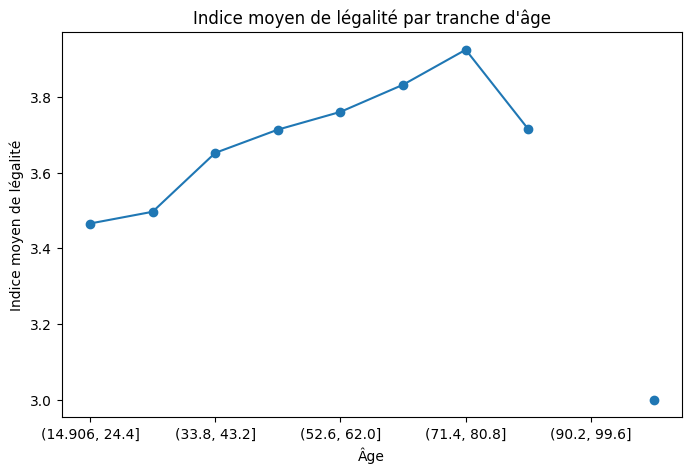

La consommation de produits culturels est majoritairement légale pour des tranches d'âges plus élevés
La moyenne globale de l'indice de l'égalité est de 3.6482680934947904 ce qui est une moyenne très haute. 
Les individus consomment globalement du contenu légalement.


In [ ]:
df_plot = (
    df_barometre_recode
    .dropna(subset=["age", "indice_legalite"])
    .sort_values("age")
)

df_plot["age_bin"] = pd.cut(df_plot["age"], bins=10)

df_mean = df_plot.groupby("age_bin")["indice_legalite"].mean()



df_mean.plot(figsize=(8, 5), marker="o")

plt.xlabel("Âge")
plt.ylabel("Indice moyen de légalité")
plt.title("Indice moyen de légalité par tranche d'âge")
plt.show()

print("La consommation de produits culturels est majoritairement légale pour des tranches d'âges plus élevés")
moyenne_indice_legal = df_barometre_recode["indice_legalite"].mean()

print(f"La moyenne globale de l'indice de l'égalité est de {moyenne_indice_legal} ce qui est une moyenne très haute. \nLes individus consomment globalement du contenu légalement.")

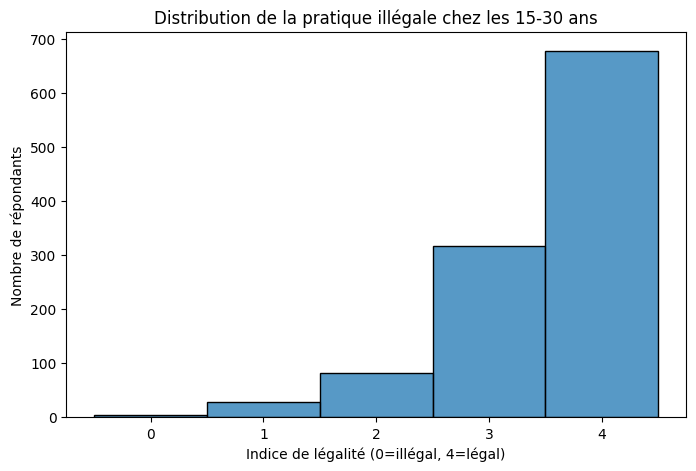

In [ ]:
df_15_24 = df_barometre_recode[(df_barometre_recode["age"] >= 15) & (df_barometre_recode["age"] <= 30)]

plt.figure(figsize=(8, 5))
sns.histplot(df_15_24["indice_legalite"], bins=5, discrete=True, kde=False)
plt.xlabel("Indice de légalité (0=illégal, 4=légal)")
plt.ylabel("Nombre de répondants")
plt.title("Distribution de la pratique illégale chez les 15-30 ans")
plt.show()

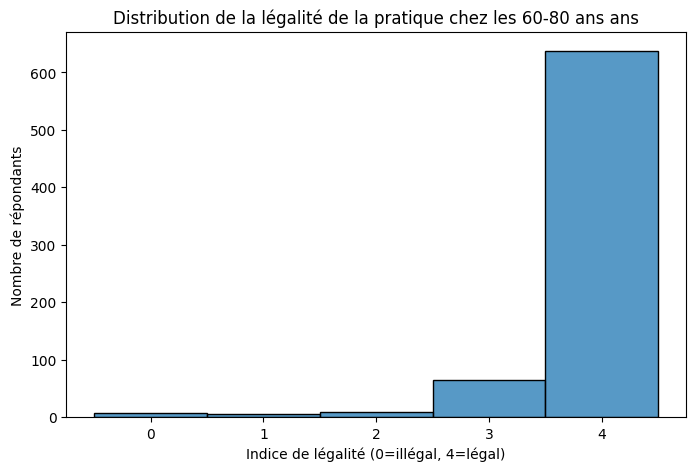

In [ ]:
df_70_80 = df_barometre_recode[(df_barometre_recode["age"] >= 60) & (df_barometre_recode["age"] <= 80)]

plt.figure(figsize=(8, 5))
sns.histplot(df_70_80["indice_legalite"], bins=5, discrete=True, kde=False)
plt.xlabel("Indice de légalité (0=illégal, 4=légal)")
plt.ylabel("Nombre de répondants")
plt.title("Distribution de la légalité de la pratique chez les 60-80 ans ans")
plt.show()

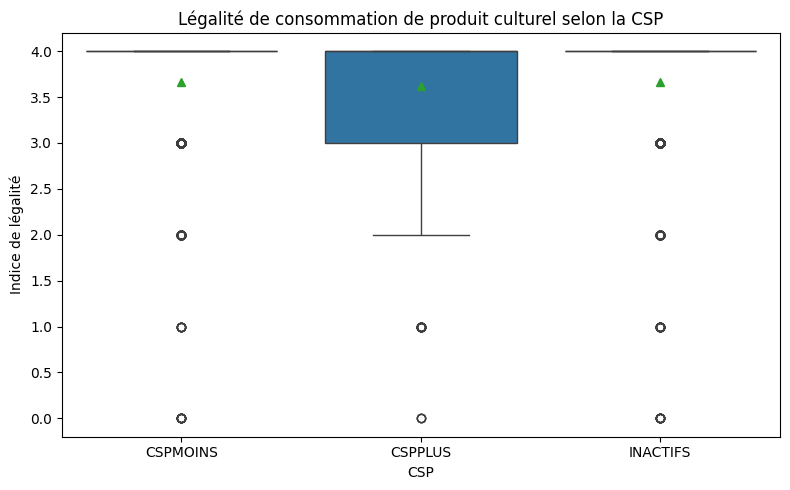

Les catégories professionnelles supérieures ont tendance à plus consommer illégalement que les autres


In [ ]:
df_barometre_recode["csps"] = df_barometre_brut["PI4"]
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_barometre_recode,
    x="csps",
    y="indice_legalite",
    showmeans=True
)

plt.ylabel("Indice de légalité")
plt.xlabel("CSP")

plt.title("Légalité de consommation de produit culturel selon la CSP")

# Rotation ou ajustement si les labels se chevauchent
plt.tight_layout()
plt.show()

print("Les catégories professionnelles supérieures ont tendance à plus consommer illégalement que les autres")



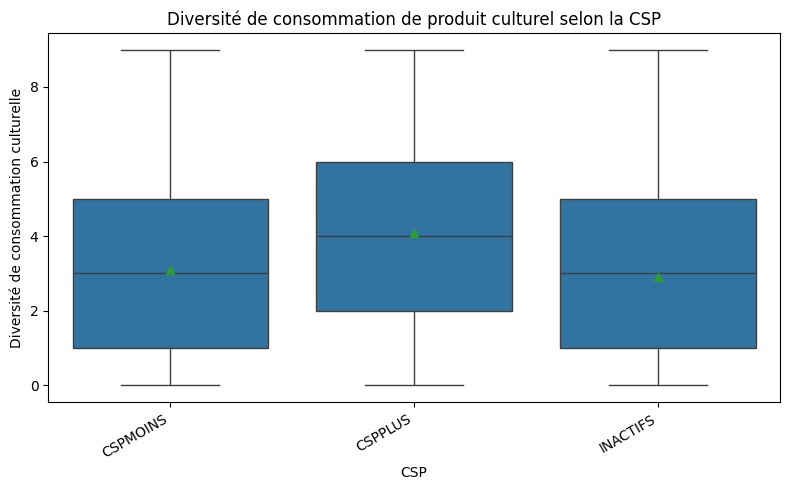

Les CSP+ consomment davantage de médias culturels différents


In [ ]:
df_barometre_recode["csps"] = df_barometre_brut["PI4"]
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_barometre_recode,
    x="csps",
    y="diversite",
    showmeans=True
)

plt.ylabel("Diversité de consommation culturelle")
plt.xlabel("CSP")

plt.title("Diversité de consommation de produit culturel selon la CSP")

# Rotation ou ajustement si les labels se chevauchent
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

print("Les CSP+ consomment davantage de médias culturels différents")

### Pratique d'écoute de musique en ligne



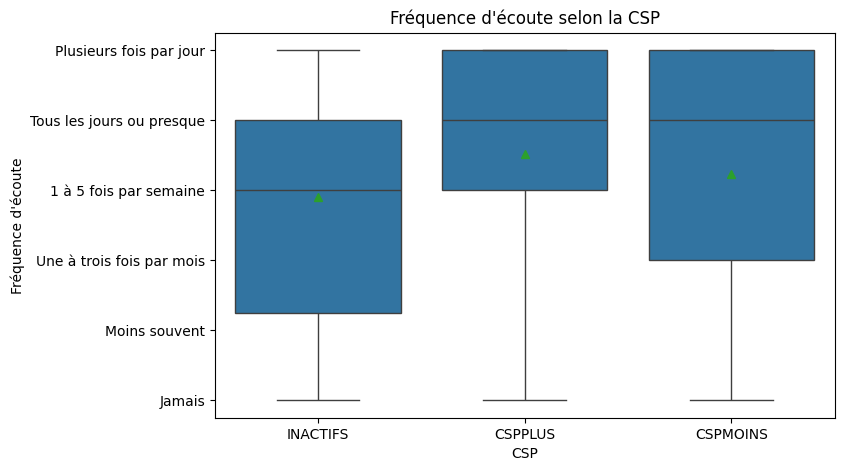

Les CSP+ sont ceux qui écoutent le plus de musique
On peut donc supposer que les CSP+ consomment davantage de tous les médias culturels, 
ce qui pourrait expliquer pourquoi ce sont eux qui consomment le plus illégalement.


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_musique_recode,
    x="csp",
    y="freq_ecoute",
    showmeans=True
)

plt.xlabel("CSP")
plt.ylabel("Fréquence d'écoute")
plt.yticks([1, 2, 3, 4, 5, 6], ["Jamais", "Moins souvent", "Une à trois fois par mois", "1 à 5 fois par semaine", "Tous les jours ou presque", "Plusieurs fois par jour"])
plt.title("Fréquence d'écoute selon la CSP")

plt.show()

print("Les CSP+ sont ceux qui écoutent le plus de musique")
print("On peut donc supposer que les CSP+ consomment davantage de tous les médias culturels, \nce qui pourrait expliquer pourquoi ce sont eux qui consomment le plus illégalement.")

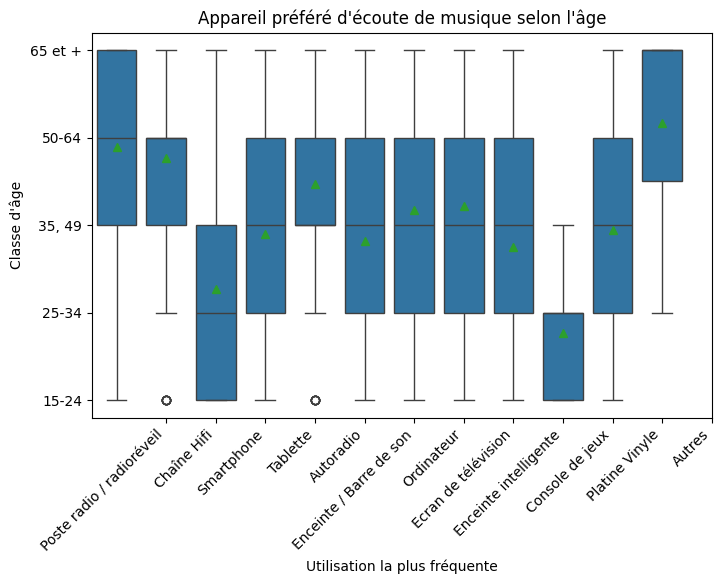

Les individus des tranches d’âge supérieures ont tendance à utiliser des appareils plus traditionnels, tels qu’un poste radio ou une chaîne Hi-Fi, 
tandis que les plus jeunes privilégient les technologies récentes, comme le smartphone ou la console de jeux.


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_musique_recode,
    x="utilisation_max",
    y="ages_echelle",
    showmeans=True
)

plt.xlabel("Utilisation la plus fréquente")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["Poste radio / radioréveil", "Chaîne Hifi", "Smartphone", "Tablette", "Autoradio", "Enceinte / Barre de son", "Ordinateur", "Ecran de télévision", "Enceinte intelligente", "Console de jeux", "Platine Vinyle", "Autres"])
plt.ylabel("Classe d'âge")
plt.yticks([1, 2, 3, 4, 5], ["15-24", "25-34", "35, 49", "50-64", "65 et +"])
plt.title("Appareil préféré d'écoute de musique selon l'âge")
plt.xticks(rotation=45, ha='right')  # 45° ou 30° selon la lisibilité

plt.show()

print("Les individus des tranches d’âge supérieures ont tendance à utiliser des appareils plus traditionnels, tels qu’un poste radio ou une chaîne Hi-Fi, \ntandis que les plus jeunes privilégient les technologies récentes, comme le smartphone ou la console de jeux.")

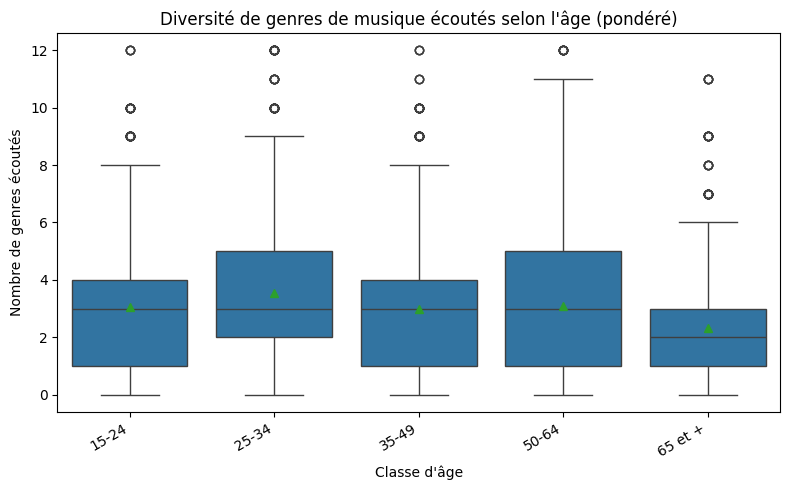

La diversité d'écoute a tendance à très légèrement baisser avec l'âge, 
bien qu'on remarque que la tranche 50-64 ans contient plus d'individus ayant une grande diversité d'écoute.
Coefficient de corrélation de Pearson : -0.116
p-value : 4.734e-08


In [ ]:
df_boxplot = df_musique_recode[df_musique_recode["poids"] > 0].copy()
df_boxplot = df_boxplot.reset_index(drop=True)

df_boxplot["poids_norm"] = np.ceil(df_boxplot["poids"] / df_boxplot["poids"].max() * 10)

df_boxplot = df_boxplot.loc[df_boxplot.index.repeat(df_boxplot["poids_norm"])]

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_boxplot,
    x="ages_echelle",
    y="nb_genre",
    showmeans=True
)

plt.ylabel("Nombre de genres écoutés")
plt.xlabel("Classe d'âge")
plt.xticks([0, 1, 2, 3, 4], ["15-24", "25-34", "35-49", "50-64", "65 et +"])
plt.title("Diversité de genres de musique écoutés selon l'âge (pondéré)")

# Rotation ou ajustement si les labels se chevauchent
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

print("La diversité d'écoute a tendance à très légèrement baisser avec l'âge, \nbien qu'on remarque que la tranche 50-64 ans contient plus d'individus ayant une grande diversité d'écoute.")

df_test = df_musique_recode.dropna(subset=["ages_echelle", "nb_genre"])

# Test de corrélation de Pearson
corr, p_value = pearsonr(df_test["ages_echelle"], df_test["nb_genre"])

print(f"Coefficient de corrélation de Pearson : {corr:.3f}")
print(f"p-value : {p_value:.3e}")

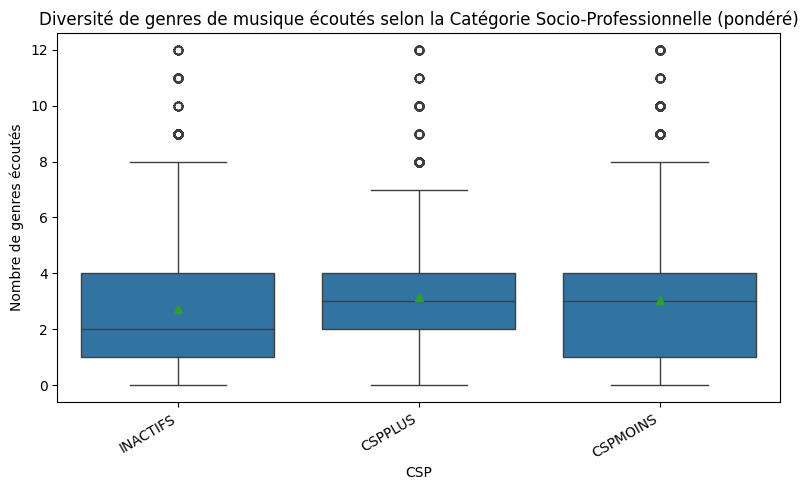

On remarque une moyenne légèrement plus haute pour les CSP+


In [ ]:
pdf_boxplot = df_musique_recode[df_musique_recode["poids"] > 0].copy()
df_boxplot = df_boxplot.reset_index(drop=True)

df_boxplot["poids_norm"] = np.ceil(df_boxplot["poids"] / df_boxplot["poids"].max() * 10)

df_boxplot = df_boxplot.loc[df_boxplot.index.repeat(df_boxplot["poids_norm"])]

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_boxplot,
    x="csp",
    y="nb_genre",
    showmeans=True
)

plt.ylabel("Nombre de genres écoutés")
plt.xlabel("CSP")
plt.title("Diversité de genres de musique écoutés selon la Catégorie Socio-Professionnelle (pondéré)")

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
print("On remarque une moyenne légèrement plus haute pour les CSP+")


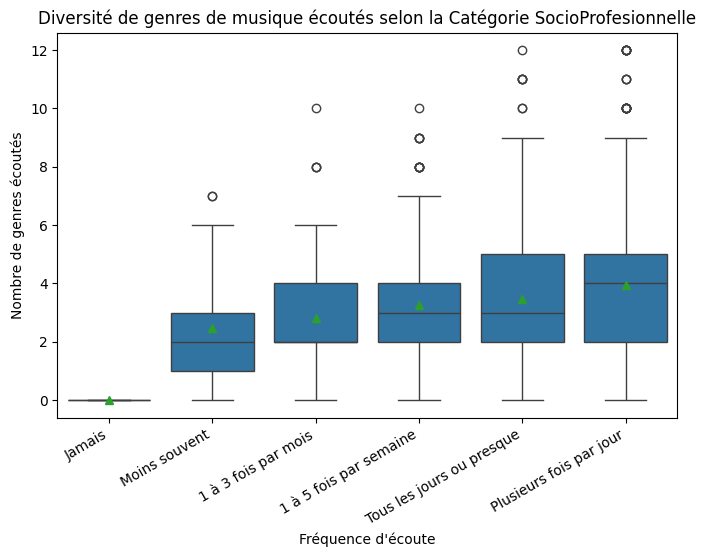

Une corrélation positive entre la fréquence d'écoute de musique et la diversité d'écoute est observée.
Coefficient de corrélation de Pearson : 0.443
p-value : 3.520e-106


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_musique_recode,
    x="freq_ecoute",
    y="nb_genre",
    showmeans=True
)

plt.ylabel("Nombre de genres écoutés")
plt.xlabel("Fréquence d'écoute")
plt.xticks([0, 1, 2, 3, 4, 5],
           ["Jamais", "Moins souvent", "1 à 3 fois par mois", "1 à 5 fois par semaine",
            "Tous les jours ou presque", "Plusieurs fois par jour"])
plt.title("Diversité de genres de musique écoutés selon la Catégorie SocioProfesionnelle")
plt.xticks(rotation=30, ha='right')  # 45° ou 30° selon la lisibilité

plt.show()

print("Une corrélation positive entre la fréquence d'écoute de musique et la diversité d'écoute est observée.")

df_test = df_musique_recode.dropna(subset=["freq_ecoute", "nb_genre"])

# Test de corrélation de Pearson
corr, p_value = pearsonr(df_test["freq_ecoute"], df_test["nb_genre"])

print(f"Coefficient de corrélation de Pearson : {corr:.3f}")
print(f"p-value : {p_value:.3e}")

Corrélation entre omnivorisme musical et omnivorisme culturel ?

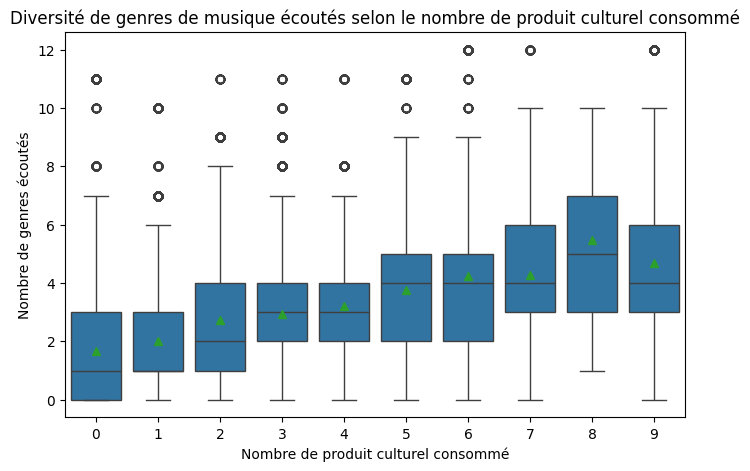

Une corrélation positive est observée entre la diversité de genres de musique écoutés et le nombre de produit culturel consommé.
Coefficient de corrélation de Pearson : 0.437
p-value : 0.000e+00


In [ ]:
pdf_boxplot = df_musique_recode[df_musique_recode["poids"] > 0].copy()
df_boxplot = df_boxplot.reset_index(drop=True)

df_boxplot["poids_norm"] = np.ceil(df_boxplot["poids"] / df_boxplot["poids"].max() * 10)

df_boxplot = df_boxplot.loc[df_boxplot.index.repeat(df_boxplot["poids_norm"])]

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_boxplot,
    x="diversite",
    y="nb_genre",
    showmeans=True
)

plt.ylabel("Nombre de genres écoutés")
plt.xlabel("Nombre de produit culturel consommé")

plt.title("Diversité de genres de musique écoutés selon le nombre de produit culturel consommé")

plt.show()

print("Une corrélation positive est observée entre la diversité de genres de musique écoutés et le nombre de produit culturel consommé.")

df_test = df_boxplot.dropna(subset=["diversite", "nb_genre"])

# Test de corrélation de Pearson
corr, p_value = pearsonr(df_test["diversite"], df_test["nb_genre"])

print(f"Coefficient de corrélation de Pearson : {corr:.3f}")
print(f"p-value : {p_value:.3e}")

## Analyse <a class="anchor" id="analyse"></a>

### ACM sur la diversité de consommation et la fréquence

Homogénéisation des variables de consommation en les rendant qualitatives et binaires pour réaliser une Analyse des Correspondances multiples

On cherche à explorer les relations entre les différentes pratiques et identifier des profils de consommateurs culturels

In [ ]:
pratiques = [
    "conso_demat_mus", "conso_demat_films", "conso_demat_series",
    "conso_demat_photos", "conso_demat_jv", "conso_demat_livres",
    "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"
]

for col in pratiques:
    df_barometre_recode[col + "_bin"] = np.where(df_barometre_recode[col].notna() & (df_barometre_recode[col] != 0), "Oui", "Non")


# Variables de pratiques uniquement
acm_vars = [c for c in df_barometre_recode.columns if c.endswith("_bin") or c.startswith("freq_")]
print("Variables actives ACM :", acm_vars)
# print(df_barometre_recode[acm_vars].head()) #pour visualiser la partie du dataframe utilisée

mca = MCA(n_components=3,random_state=42) #choix de 3 composantes a posteriori pour la méthode du coude

mca_fit = mca.fit(df_barometre_recode[acm_vars])


Variables actives ACM : ['freq_demat_mus', 'freq_demat_films', 'freq_demat_series', 'freq_demat_photos', 'freq_demat_jv', 'freq_demat_livres', 'freq_demat_logi', 'freq_demat_presse', 'freq_demat_retrans', 'conso_demat_mus_bin', 'conso_demat_films_bin', 'conso_demat_series_bin', 'conso_demat_photos_bin', 'conso_demat_jv_bin', 'conso_demat_livres_bin', 'conso_demat_logi_bin', 'conso_demat_presse_bin', 'conso_demat_retrans_bin']


Une fois les variables choisie et l'ACM réalisée, nous pouvons choisir le nombre d'axes que nous retenons par la méthode du coude. 

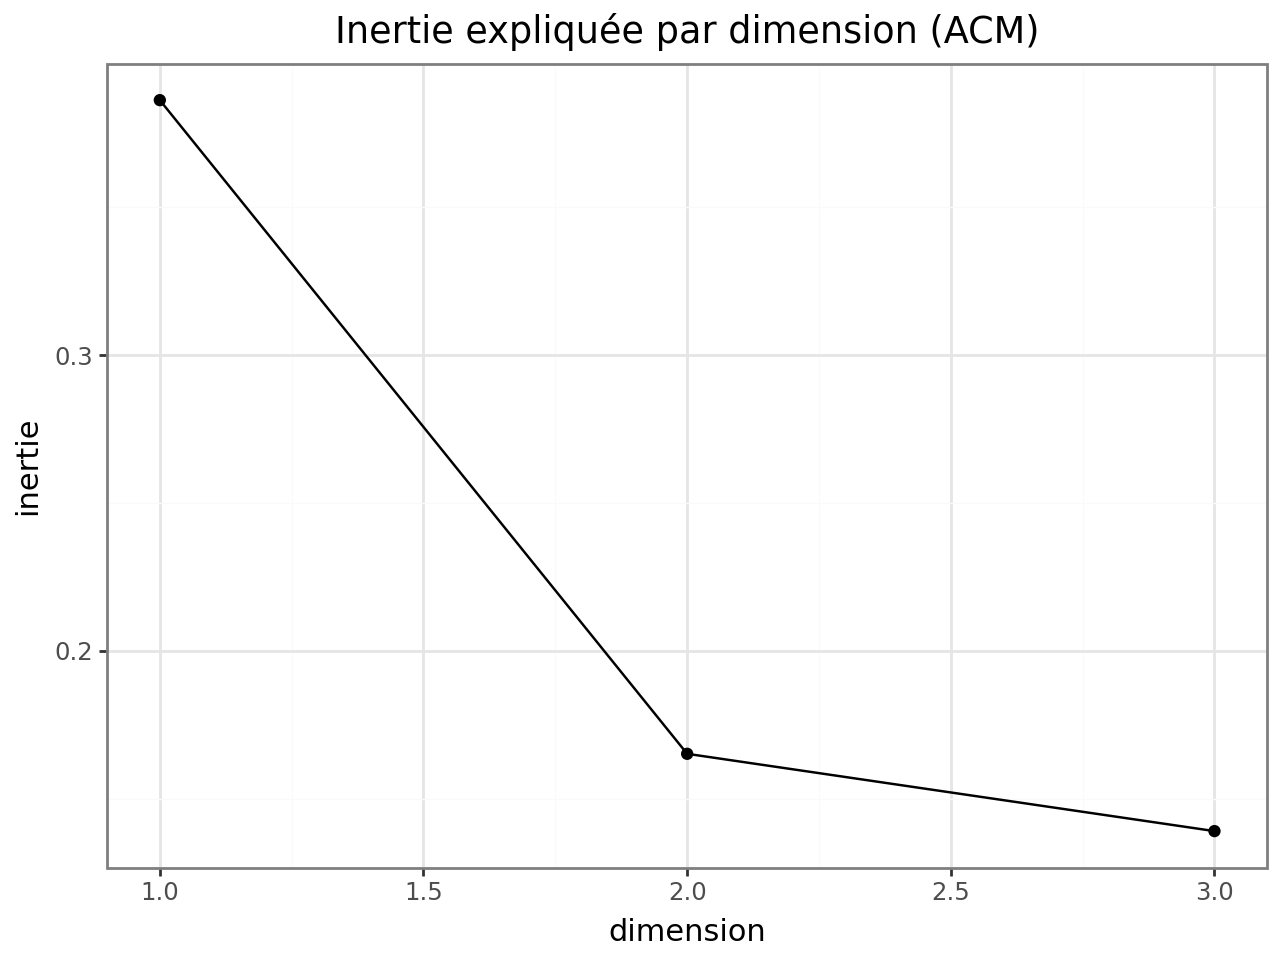

In [ ]:
# Inertie expliquée
eig = mca_fit.eigenvalues_
inertia_df = pd.DataFrame({
    "dimension": range(1, len(eig) + 1),
    "inertie": eig,
    "inertie_cumulee": np.cumsum(eig)
})

p_inertia = (
    ggplot(inertia_df, aes(x="dimension", y="inertie")) +
    geom_line() + geom_point() +
    theme_bw() +
    labs(title="Inertie expliquée par dimension (ACM)")
)

p_inertia

La dimension 1 représente environ 38% de l'inertie tandis que la deuxième dimension en représente 17%. La méthode du coude nous indique dans ce cas de choisir deux axes: l'inertie expliquée par les deux premiers axes atteint environ 53%, tandis que rajouter le troisième ne rajoute qu'environ 13% d'inertie expliquée.

In [ ]:
contrib = mca.column_contributions_

contrib_12 = contrib.iloc[:, :2]
contrib_12.columns = ["Dim1", "Dim2"]

print("\nTop contributions – Dimension 1")
print(contrib_12["Dim1"].sort_values(ascending=False).head(15))

print("\nTop contributions – Dimension 2")
print(contrib_12["Dim2"].sort_values(ascending=False).head(15))


Top contributions – Dimension 1
conso_demat_films_bin__Non      0.094082
conso_demat_series_bin__Non     0.081971
conso_demat_mus_bin__Non        0.077907
conso_demat_jv_bin__Non         0.061512
conso_demat_photos_bin__Non     0.058292
conso_demat_logi_bin__Non       0.043049
conso_demat_livres_bin__Non     0.039464
conso_demat_presse_bin__Non     0.035932
conso_demat_retrans_bin__Non    0.031569
conso_demat_logi_bin__Oui       0.029867
conso_demat_jv_bin__Oui         0.029701
conso_demat_series_bin__Oui     0.028663
conso_demat_films_bin__Oui      0.028106
conso_demat_retrans_bin__Oui    0.027562
freq_demat_mus__Intensif        0.025736
Name: Dim1, dtype: float64

Top contributions – Dimension 2
freq_demat_films__Intensif       0.089902
freq_demat_jv__Intensif          0.069865
freq_demat_series__Intensif      0.066470
conso_demat_presse_bin__Oui      0.046292
freq_demat_livres__Intensif      0.041146
freq_demat_retrans__Intensif     0.040123
freq_demat_films__Occasionnel    0.03879

L'axe 1 est marqué par l'opposition entre consommation et non-consommation de biens culturels dématérialisés. C'est un axe d’intensité et de diversification de la consommation numérique.
L'axe 2 distingue les usages intensifs des usages plus occasionnels ou rares, c'est donc un axe de voracité de la consommation de ces biens.

Nous pouvons maintenant projeter les individus sur le plan factoriel de ces deux dimensions. 

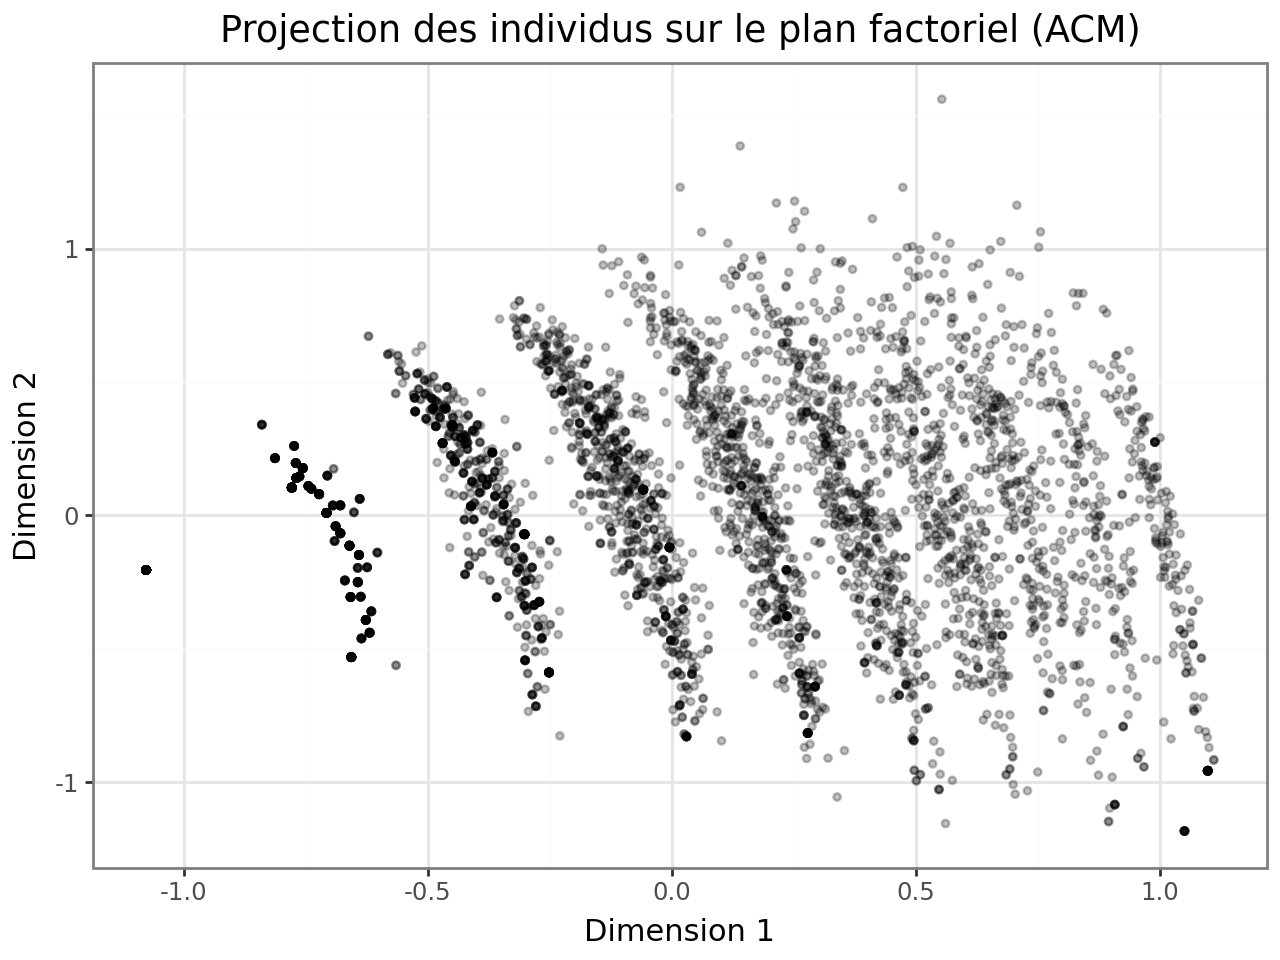

In [ ]:
# Coordonnées individuelles
coords = mca_fit.transform(df_barometre_recode[acm_vars])

ind = coords.iloc[:, :2].copy()
ind.columns = ["Dim1", "Dim2"]


p_ind = (
    ggplot(ind, aes(x="Dim1", y="Dim2")) +
    geom_point(alpha=0.25, size=1) +
    theme_bw() +
    labs(
        title="Projection des individus sur le plan factoriel (ACM)",
        x="Dimension 1",
        y="Dimension 2"
    )
)

p_ind

Le long de l'axe horizontal, sont regroupés à gauche les individus qui consomment peu en dématérialisé, au centre, les consommateurs occasionnels, et à droite les consommateurs multiples. Dans chaque bande verticale, les utilisateurs sont étalés en hauteur, ce qui exprime, à diversité de pratiques comparables des niveaux d'intensité différents. On peut donc conclure que les individus se répartissent par strates, celles-ci correspondant à un engagement progressif dans la consommation de biens culturels dématérialisés. 

### Clustering

Une fois la projection faite, nous nous intéressons aux groupes de consommateurs de biens culturels. Pour identifier ceux-ci, nous allons avoir recours à du clustering par KMeans. Il s'agit de regrouper les individus autour de barycentres les plus proches. L'objectif sera ensuite d'analyser la composition socio-démographique de ces groupes. 
Ne sachant pas encore quel nombre de classes choisir, nous allons choisir parmi ceux qui expliquent le mieux l'inertie, tout en conservant l'interprétabilité de celles-ci. Pour ce faire, nous allons représenter l'inertie expliquée en fonction du nombre de cluster (la méthode du coude nous indiquera ici de n'en conserver que 4), et par soucis d'interprétabilité, nous allons aussi afficher la proportion d'individus contenus dans chaque clusters. 



3 clusters
2    0.42
1    0.31
0    0.26
Name: proportion, dtype: float64

4 clusters
1    0.31
2    0.29
0    0.21
3    0.19
Name: proportion, dtype: float64

5 clusters
2    0.29
1    0.23
4    0.18
3    0.17
0    0.13
Name: proportion, dtype: float64


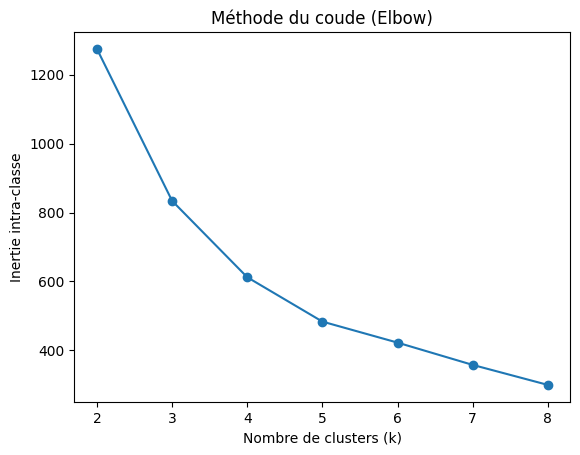

In [ ]:
X = coords.iloc[:, :2]  #on ne garde toujours que les 2 premieres dimensions

inertia = []

K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    inertia.append(km.inertia_)
    if k in [3,4,5]:
        labels = km.fit_predict(X)
        print(f"\n{k} clusters")
        print(pd.Series(labels).value_counts(normalize=True).round(2))

#methode du coude 
elbow_df = pd.DataFrame({"k": K, "inertia": inertia})
plt.figure()
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude (Elbow)")
plt.show()




Avec la méthode du coude, et en comparant la taille des clusters, on choisira d'en garder 4.

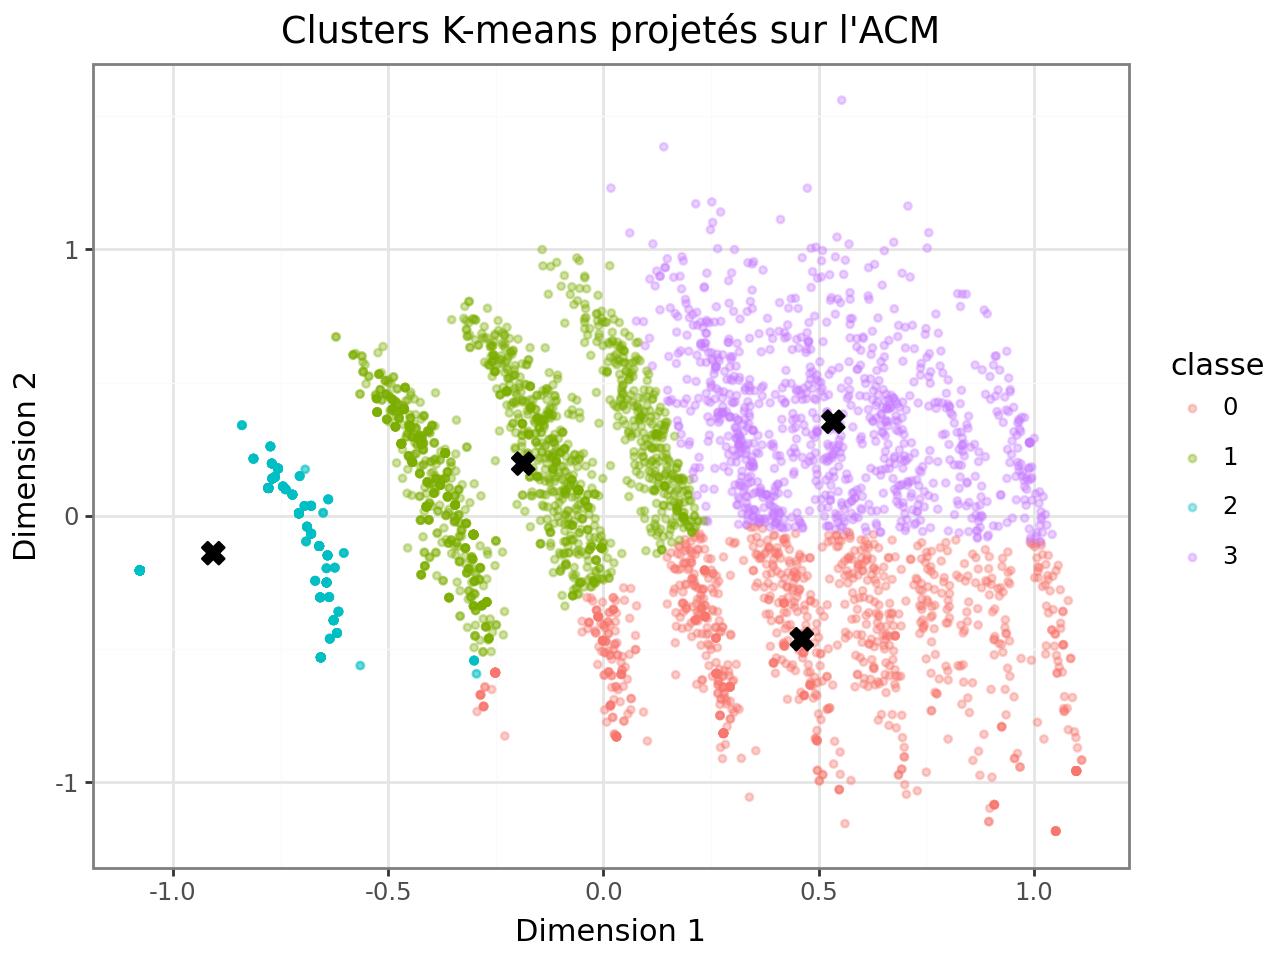

In [ ]:
X = coords.iloc[:, :2].copy()
X.columns = ["Dim_1", "Dim_2"]

kmeans = KMeans(n_clusters=4, random_state=42)
df_barometre_recode["classe"] = kmeans.fit_predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids["classe"] = centroids.index.astype("category")

plot_df = X.copy()
plot_df["classe"] = df_barometre_recode["classe"].astype("category")

p = (
    ggplot(plot_df, aes("Dim_1", "Dim_2", color="classe")) +
    geom_point(alpha=0.35, size=1) +
    geom_point(data=centroids, mapping=aes("Dim_1", "Dim_2"),
               color="black", size=4, shape="X") +
    theme_bw() +
    labs(title="Clusters K-means projetés sur l'ACM",
         x="Dimension 1", y="Dimension 2")
)

p

Nous obtenons ainsi 4 classes: la classe 0, qui caractérise des consommateurs à préférences pour la diversité, mais avec des pratiques plus sélectives, la 1, qui représente les  utilisateurs ayant une consommation sélective et régulière, la 2, qui est celle des les faibles consommateurs, et la dernière classe, la 3, regroupe les consommateurs au profil omnivore et vorace.
Pour comprendre quels profils ont nos clusters, nous allons décrire les caractéristiques socio-économiques des individus leur appartenant. 

L'enjeu est de repérer les cluster où les classes supérieures sont plus ou sur-représentées. Pour l'étape de profilage, nous avons utilisé les pondérations individuelles de l'enquête, afin de corriger les déséquilibres de l'échantillon et garantir la représentativité de nos résultats. Nous allons d'abord procéder à un profilage rapide sur les variables de sexe, age, et les variables géographiques (commune de plus de 100 000 habitants et province).

In [ ]:
profil_csp = fonctions.profil_categoriel(df_barometre_recode, "sexe")
profil_csp.round(1)


sexe,0,1
classe,,
0,49.9,50.1
1,51.7,48.3
2,41.3,58.7
3,56.4,43.6


In [ ]:
profil_csp_geo = fonctions.profil_categoriel(df_barometre_recode, "plusde10000habitants")
profil_csp_geo.round(1)

plusde10000habitants,0,1
classe,,
0,42.2,57.8
1,53.8,46.2
2,59.3,40.7
3,47.6,52.4


In [ ]:
profil_csp_province = fonctions.profil_categoriel(df_barometre_recode, "province")
profil_csp_province.round(1)

province,0,1
classe,,
0,22.7,77.3
1,19.9,80.1
2,13.9,86.1
3,22.0,78.0


In [ ]:
profil_csp_trage = fonctions.profil_categoriel(df_barometre_recode, "trage")
profil_csp_trage.round(1)

trage,De15a24ans1,De25a34ans1,De35a49ans1,De50a64ans1,De65aPlus
classe,,,,,
0,30.9,28.3,26.7,11.2,3.0
1,11.9,12.6,27.3,25.7,22.5
2,8.0,9.4,26.8,29.4,26.5
3,19.8,19.2,27.3,20.8,12.9


Les deux premiers clusters sont équilibrés en fonction du genre, les deux derniers présentent un déséquilibre. Les femmes sont sur-représentées parmi les non-consommateurs, et les hommes parmi les consommateurs voraces et omnivores. 
De même, la population d'Ile de France (environ 18% de la population française) est légèrement sous-représentée dans le cluster des non-consommateurs. 
On observe de plus des effets de l'âge sur la diversité de la consommation: les plus âgées consomment moins, ce qui pouvait être attendu (nous travaillons sur les pratiques numériques, or les personnes plus âgées utilisent moins ces outils et donc consomment moins).

In [ ]:
profil_csp = fonctions.profil_categoriel(df_barometre_recode, "csp")
profil_csp.round(1)

csp,Agriculteurs1,Artisans1,Autres1,Cadres1,ElevesEtudiantsPemploi,Employes1,Intermediaires1,Ouvriers1,RetraitesCSPMoins,RetraitesCSPPlus
classe,,,,,,,,,,
0,1.2,6.9,4.5,15.6,21.8,17.3,11.6,15.1,2.8,3.2
1,0.7,3.6,6.6,8.6,8.5,17.8,14.4,12.9,8.0,19.0
2,1.2,2.3,10.0,4.3,4.6,17.5,12.7,13.1,13.7,20.5
3,0.8,4.3,4.1,15.7,15.3,14.6,18.3,10.6,2.7,13.7


Le cluster 0 se caractérise par un omnivorisme marqué et une consommation occasionnelle. Les cadres comptent 15.6% des personnes de cette classe, les employés et ouvriers composent 32.4% de la classe. C'est une classe plutôt générale, sans être populaire ou élitiste.

Le cluster 1, regroupant les utilisateurs ayant une consommation sélective et régulière (omnivorisme sélectif mais non vorace), est composé d'individus plus diplômés (19% de retraités de classe supérieure, 8.6% de cadres et 14.4% de personnes exerçant des professions intermédiaires), mais aussi plus âgé (27% de retraités).

Le cluster 2, les faibles consommateurs, regroupe principalement des retraités (34.2%), et des ouvriers et employés (30.6%). Le profil des faibles consommateurs est très éloigné des classes supérieures actives (4.6% de cadres, il s'agit de la plus faible proportion parmi les 4 clusters).

Le cluster 3, avec un profil omnivore et vorace, compte 15.7% de cadres et 18.3% de personnes exerçant des professions intermédiaires, ce qui en fait le cluster avec la plus grande proportion de ces deux catégories. En cumulant cadres actifs et retraités de classe supérieure, on arrive alors à 29.4% du cluster représenté (47.7% en ajoutant les professions intermédiaires). 

L'hypothèse de départ, selon laquelle les classes supérieures seraient plus omnivores et voraces semble ici être vérifiée de manière descriptive. 
Nous allons maintenant tester cette hypothèse avec des régressions. 

### Régressions linéaires pondérées

Nous cherchons maintenant à comparer les profils issus du clustering. Pour cela nous allons procéder à des régressions. Notre variable dépendante (le fait d'appartenir au cluster i ou non) étant binaire, nous avons recours à des régressions logistiques, formulées dans le cadre des régressions linéaires généralisées. Ces modèles nous permettront d'obtenir des probabilités prédites comprises entre 0 et 1 et des hypothèses statistiques adaptées à nos données.

Afin d’identifier les facteurs associés à l’appartenance aux différents profils de consommation, nos régressions incluent plusieurs variables explicatives exprimant les caractéristiques sociodémographiques et territoriales des individus. 
Nous avons saisie la position sociale des individus par leur catégorie socioprofessionnelle, en distinguant les classes supérieures actives. Nous avons fait le choix de ne pas inclure les retraités de classe supérieures, car ils ont des pratiques marquées par leur âge (faible consommation dématérialisée), et peuvent donc flouter nos interprétations entre les liens du capital culturel et ressources actives.
Nous contrôlons l’âge et le sexe et incluons des variables géographiques, telle que l’appartenance à une grande aire urbaine (plus ou moins de 100 000 habitants). Nous avons obtenu les estimations à partir de données pondérées, pour les mêmes raisons citées que celles du profilage pondéré des clusters. 

In [ ]:
#variable dépendante
df_barometre_recode["cluster_3"] = (df_barometre_recode["classe"] == 3).astype(int)

#ajout de la variable classe_sup et sélection des variables de contrôle
df_barometre_recode["classe_sup"] = df_barometre_recode["csp"].isin([ "Cadres1", "ProfessionsIntermediaires1"]).astype(int)

var_controle= ["classe_sup", "age", "sexe", "plusde10000habitants", "province" ]               # 0 si IDF, 1 si province

y = df_barometre_recode["cluster_3"]
X = df_barometre_recode[var_controle]


X = sm.add_constant(X)
model_c3 = sm.GLM(
    y, X,
    family=sm.families.Binomial(),
    freq_weights=df_barometre_recode["poids"]
).fit(cov_type="HC1")

print(model_c3.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              cluster_2   No. Observations:                 5002
Model:                            GLM   Df Residuals:                  4996.00
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.9
Date:                Mon, 29 Dec 2025   Deviance:                       5693.8
Time:                        21:10:47   Pearson chi2:                 5.09e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08997
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.6532 

In [ ]:
odds_ratios = np.exp(model_c3.params)
odds_ratios

const                   0.070425
classe_sup              0.425119
age                     1.032299
sexe                    1.729868
plusde10000habitants    0.782105
province                1.334083
dtype: float64

Le coefficient associé à la variable classe_sup est positif et significatif. Toutes choses égales par ailleurs, l’appartenance aux classes supérieures est associée à une probabilité significativement plus élevée d’appartenir au cluster caractérisé par une forte voracité et un fort omnivorisme culturel.

L’odds ratio est obtenu en prenant l'exponentielle du coefficient de la régression logistique (OR = e^β). Il mesure combien les chances d’appartenir au cluster de forte voracité et d’omnivorisme sont multipliées lorsque l’on appartient aux classes supérieures (ici par ), toutes choses égales par ailleurs.

Analyse des autres clusters et comparaison

In [ ]:
results = {}

for k in sorted(df_barometre_recode["classe"].unique()):
    df_barometre_recode[f"cluster_{k}"] = (df_barometre_recode["classe"] == k).astype(int)

    y = df_barometre_recode[f"cluster_{k}"]
    X = sm.add_constant(df_barometre_recode[var_controle])

    model = sm.GLM(
        y, X,
        family=sm.families.Binomial(),
        freq_weights=df_barometre_recode["poids"]
    ).fit()

    results[k] = model

    print(f"\n=== Cluster {k} ===")
    print(np.exp(model.params))



=== Cluster 0 ===
const                   1.797838
classe_sup              1.662959
age                     0.947047
sexe                    0.858138
plusde10000habitants    1.492439
province                1.056651
dtype: float64

=== Cluster 1 ===
const                   0.315071
classe_sup              0.829724
age                     1.014144
sexe                    0.883424
plusde10000habitants    0.876378
province                0.828068
dtype: float64

=== Cluster 2 ===
const                   0.070425
classe_sup              0.425119
age                     1.032299
sexe                    1.729868
plusde10000habitants    0.782105
province                1.334083
dtype: float64

=== Cluster 3 ===
const                   0.422113
classe_sup              1.713915
age                     0.988118
sexe                    0.691689
plusde10000habitants    1.115611
province                0.927060
dtype: float64


Maintenant nous allons nous intéresser à l'omnivorisme de la consommation de musique, en construisant un score d'omnivorisme sur les genres de musique, afin de comparer le lien entre diversité de genres écoutés et appartenance aux classes supérieures, et celui entre diversité de consommation et classe supérieures. 


In [ ]:
df_musique_recode["score_omnivorisme_genre"] = df_musique_recode["nb_genre"]

cols = ["score_omnivorisme_genre", "csp_plus", "age", "sexe", "plusde100000hab", "idf", "poids"]
df_musique_recode[cols].dtypes


score_omnivorisme_genre      int64
csp_plus                     int64
age                         object
sexe                         int64
plusde100000hab              int64
idf                          int64
poids                      float64
dtype: object

Puisque la variable d'âge est un objet, nous allons prendre ses modalités pour les intégrer dans la régression. 

In [ ]:
y = df_musique_recode["score_omnivorisme_genre"]

age_dummies = ["15-24", "25-34", "35-49", "50-64"]  #on a pas comme dans le baromètre la variable continue d'âge
X = df_musique_recode[["csp_plus", "sexe", "plusde100000hab", "idf"] + age_dummies]

X = sm.add_constant(X)

df_reg = pd.concat([y, X, df_musique_recode["poids"]], axis=1).dropna()
y_reg = df_reg["score_omnivorisme_genre"]
X_reg = df_reg.drop(columns=["score_omnivorisme_genre", "poids"])

model = sm.WLS(y_reg, X_reg, weights=df_reg["poids"]).fit()
print(model.summary())

                               WLS Regression Results                              
Dep. Variable:     score_omnivorisme_genre   R-squared:                       0.028
Model:                                 WLS   Adj. R-squared:                  0.024
Method:                      Least Squares   F-statistic:                     7.854
Date:                     Mon, 29 Dec 2025   Prob (F-statistic):           1.86e-10
Time:                             21:10:47   Log-Likelihood:                -4897.3
No. Observations:                     2200   AIC:                             9813.
Df Residuals:                         2191   BIC:                             9864.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Une fois l'âge contrôlé, l’appartenance aux classes supérieures n’est pas associée de manière significative à une plus grande diversité des genres musicaux consommés. En revanche, l’âge apparaît comme un déterminant majeur, les jeunes déclarant une diversité de genres nettement plus élevée.

## Consommation et légalité <a class="anchor" id="legal"></a>

Nous allons maintenant nous intéresser aux possibles effets d'inclusion de la légalité dans notre analyse. En effet, lors de nos premières recherches sur la base de données, nous sommes tombées sur une statistique indiquant que les cadres étaient plus nombreux à consommer ces biens de manière illégale que les individus d'autre classe sociale. Nous avons donc voulu intégrer cette dimension à notre analyse, et vérifier si l'appartenance aux classe supérieures renforçait les chances de consommer des biens culturels illégalement. 

In [ ]:
pratiques = [
    "conso_demat_mus", "conso_demat_films", "conso_demat_series",
    "conso_demat_photos", "conso_demat_jv", "conso_demat_livres",
    "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"
]

for col in pratiques:
    df_barometre_recode[col + "_bin"] = np.where(df_barometre_recode[col].notna() & (df_barometre_recode[col] != 0), "Oui", "Non")


# Variables de pratiques uniquement
acm_vars_csp = [c for c in df_barometre_recode.columns if c.endswith("_bin") or c.startswith("freq_")] + ["conso_legale", "conso_illegale", "conso_legale_et_illegale" ]
print("Variables actives ACM :", acm_vars_csp)
# print(df_barometre_recode[acm_vars_csp].head()) #pour visualiser la partie du dataframe utilisée

mca_csp = MCA(n_components=3,random_state=42)

mca_fit_csp = mca_csp.fit(df_barometre_recode[acm_vars_csp])


Variables actives ACM : ['freq_demat_mus', 'freq_demat_films', 'freq_demat_series', 'freq_demat_photos', 'freq_demat_jv', 'freq_demat_livres', 'freq_demat_logi', 'freq_demat_presse', 'freq_demat_retrans', 'conso_demat_mus_bin', 'conso_demat_films_bin', 'conso_demat_series_bin', 'conso_demat_photos_bin', 'conso_demat_jv_bin', 'conso_demat_livres_bin', 'conso_demat_logi_bin', 'conso_demat_presse_bin', 'conso_demat_retrans_bin', 'conso_legale', 'conso_illegale', 'conso_legale_et_illegale']


In [ ]:
contrib_csp = mca_csp.column_contributions_

contrib_12_csp = contrib_csp.iloc[:, :2]
contrib_12_csp.columns = ["Dim1", "Dim2"]

print("\nTop contributions – Dimension 1")
print(contrib_12_csp["Dim1"].sort_values(ascending=False).head(15))

print("\nTop contributions – Dimension 2")
print(contrib_12_csp["Dim2"].sort_values(ascending=False).head(15))



Top contributions – Dimension 1
conso_demat_films_bin__Non      0.079010
conso_demat_series_bin__Non     0.067969
conso_demat_mus_bin__Non        0.065631
conso_demat_jv_bin__Non         0.049110
conso_demat_photos_bin__Non     0.047637
conso_legale__0                 0.047041
conso_demat_logi_bin__Non       0.033404
conso_demat_livres_bin__Non     0.030543
conso_demat_series_bin__Oui     0.030002
conso_demat_jv_bin__Oui         0.029892
conso_demat_logi_bin__Oui       0.029837
conso_demat_films_bin__Oui      0.029765
conso_demat_presse_bin__Non     0.029015
conso_demat_retrans_bin__Oui    0.027238
freq_demat_mus__Intensif        0.025524
Name: Dim1, dtype: float64

Top contributions – Dimension 2
freq_demat_films__Intensif       0.084691
freq_demat_jv__Intensif          0.067708
freq_demat_series__Intensif      0.063867
freq_demat_retrans__Intensif     0.044774
freq_demat_livres__Intensif      0.044194
conso_demat_presse_bin__Oui      0.041014
freq_demat_films__Occasionnel    0.03798

Dans cette ACM, on remarque que la consommation illégale (désignée par 'conso_legale_0') fait partie des contributions les plus hautes à l'axe 1. On peut donc postuler que pour la consommation de biens culturels dématérialisés, l’illégalité n’est pas un comportement marginal isolé: elle apparaît dans l’espace des consommateurs actifs. 

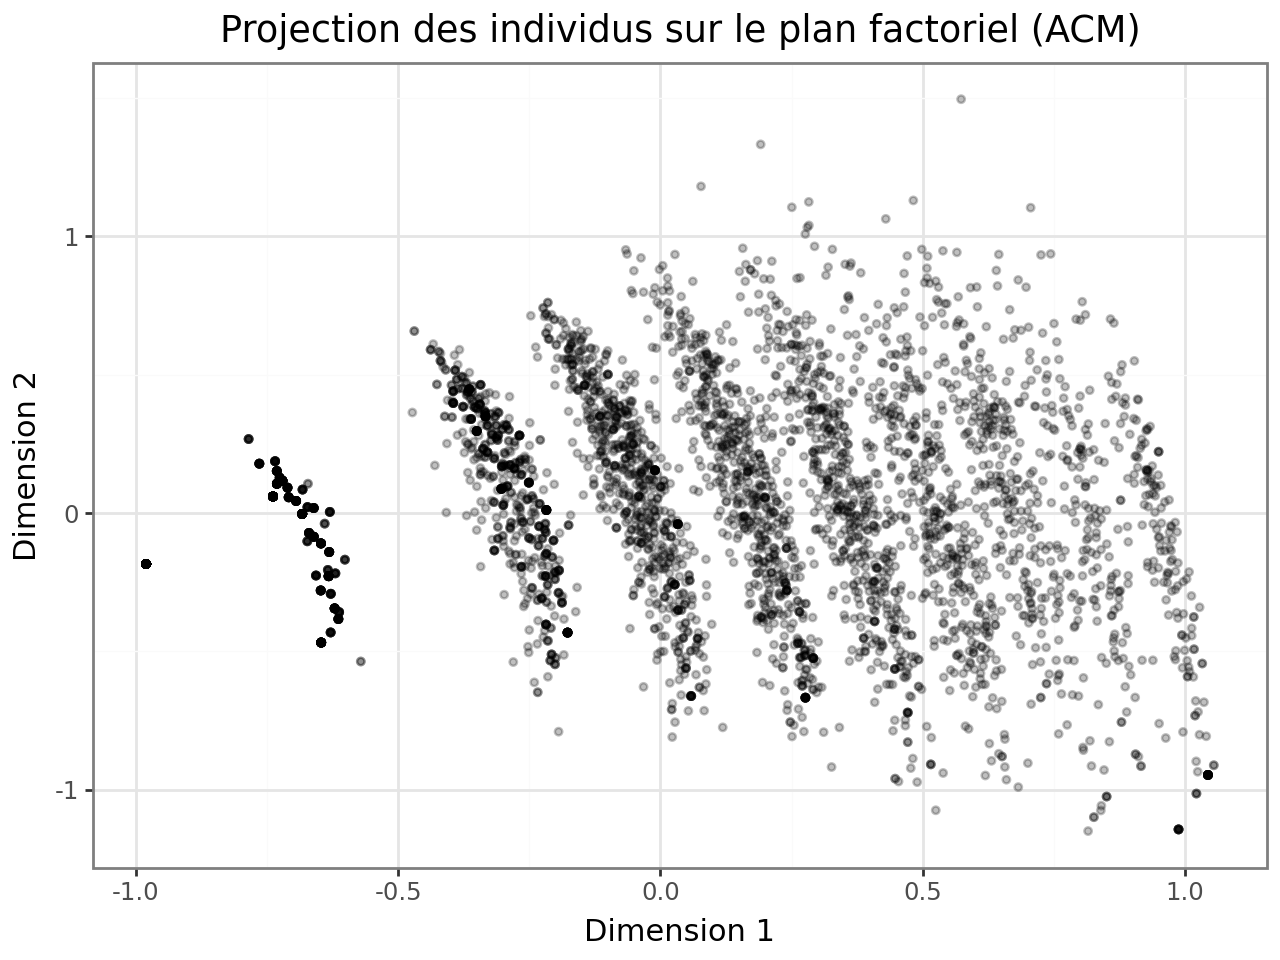

In [ ]:
# Coordonnées individuelles
coords_csp = mca_fit_csp.transform(df_barometre_recode[acm_vars_csp])

ind_csp = coords_csp.iloc[:, :2].copy()
ind_csp.columns = ["Dim1", "Dim2"]


p_ind_csp = (
    ggplot(ind_csp, aes(x="Dim1", y="Dim2")) +
    geom_point(alpha=0.25, size=1) +
    theme_bw() +
    labs(
        title="Projection des individus sur le plan factoriel (ACM)",
        x="Dimension 1",
        y="Dimension 2"
    )
)

p_ind_csp



De manière générale, la projection des individus dans l'espace des dimensions de l'ACM ressemble fortement à celle effectuée précédemment pour les pratiques, ce qui est cohérent avec l'ajout des variables de légalité (qui s'inscrivent dans des logiques de consommation déjà identifiées). Nous pouvons maintenant vérifier l'incidence de la classe sociale sur la légalité de la consommation. 

### Régressions sur le score de légalité 

Nous allons maintenant tester l'hypothèse selon laquelle les classes supérieures consomment plus de biens de manière illégale. 

Les écarts entre modalités de l'indice de légalité ne sont pas égaux. En effet, on ne peut pas supposer que passer d'une consommation qui soit totalement illégale à une consommation majoritairement illégale soit équivalent de passer d'une consommation majoritairement légale à totalement légale. 
Cela peut nous poser un problème pour mener les régressions, car notre indice n'est donc pas strictement continu. 
Nous faisons le choix d'un modèle de régression linéaire pondéré, de façon à traiter l'indice comme quasi-continu. 

De même, la question de la légalité se posant uniquement aux consommateurs, nous allons réduire la base de données aux individus n'ayant pas de valeur manquante pour l'indice.

In [ ]:
var_modele = ["indice_legalite","classe_sup","age", "sexe", "plusde10000habitants", "province", "poids"]

df_barometre_recode["classe_sup"] = df_barometre_recode["csp"].isin([
    "Cadres1",
    "ProfessionsIntermediaires1"
]).astype(int)

df_barometre_recode[var_modele].isna().mean()

indice_legalite         0.290084
classe_sup              0.000000
age                     0.000000
sexe                    0.000000
plusde10000habitants    0.000000
province                0.000000
poids                   0.000000
dtype: float64

In [ ]:
#ajout de la variable classe_sup et suppression des valeurs manquantes

df_barometre_reduit = df_barometre_recode[var_modele].dropna()

y = df_barometre_reduit["indice_legalite"]

X = df_barometre_reduit[["classe_sup", "age", "sexe", "plusde10000habitants", "province"]]

X = sm.add_constant(X)

modele_legalite = sm.WLS(
    y, X,
    weights=df_barometre_reduit["poids"]
).fit()

print(modele_legalite.summary())


                            WLS Regression Results                            
Dep. Variable:        indice_legalite   R-squared:                       0.045
Model:                            WLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     33.59
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           1.30e-33
Time:                        21:10:47   Log-Likelihood:                -3834.7
No. Observations:                3551   AIC:                             7681.
Df Residuals:                    3545   BIC:                             7719.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.2456 

L'effet de l'appartenance aux classes supérieures est ici légèrement négatif, mais aussi peu significatif (seuil de 10%). A caractéristiques comparables, les classes supérieures déclarent des pratiques légèrement moins légales que les autres groupes sociaux. Cela peut s'interpréter soit comme une tolérance plus grande à l'illégalité, soit comme des pratiques de consommation plus mixtes. 
Comme nous avons montré précédemment que les classes supérieures consomment plus, en plus grande diversité et avec un meilleur accès, nous pouvons supposer que cette baisse légère de légalité dans leur consommation est dûe à des usages hybrides, s'expliquant par une plus grande maîtrise de l'offre disponible (légale comme illégale), ainsi que par un arbitrage coût/qualité/disponibilité. 

## Conclusion <a class="anchor" id="conclusion"></a>

Nous avions pour but d’analyser les pratiques de consommation culturelle dématérialisée, en distinguant la diversité des pratiques (omnivorisme), leur intensité (voracité) et la légalité des usages, afin de répondre à la question suivante : les classes supérieures sont-elles toujours omnivores ?

À partir des données issues du Baromètre de Consommation des contenus culturels et sportifs numériques (Arcom, 2020) et de l’enquête sur les Pratiques d’écoute de musique en ligne (Arcom, 2020), nous avons utilisé des analyses descriptives, factorielles, et du clustering. Celles-ci ont mis en évidence une forte structuration sociale des pratiques culturelles dématérialisées. 
Les individus appartenant aux classes supérieures se distinguent par une consommation à la fois plus diversifiée et plus intensive, confirmant l’existence d’un omnivorisme culturel socialement différencié. Toutefois, l’ACM montre que la diversité et la fréquence relèvent de dimensions distinctes, bien que corrélées, nous invitant à dépasser l'unidimensionnalité apparente de l’omnivorisme.

Nous avons ensuite mené des régressions pondérées, qui ont confirmé l'association positive entre appartenance aux classes supérieures et haut score d'omnivorisme, et dans une moindre mesure, à un haut score de voracité. Cependant, en analysant la relation entre appartenance aux classes supérieures et légalité de la consommation, avons trouvé un résultat faiblement significatif, qui est que les classes supérieures sont plus exposées à des pratiques de consommation mixtes ou illégale. Ainsi la légalité, et l'étonnement qui nous avait saisi lors de la découverte du jeu de données, relèvent moins d'une norme de consommation que d'un effet de volume, d'accès différencié et donc de diversification des manières de consommer.

Ces résultats font écho aux travaux de sociologie de la culture qui soulignent une transformation des mécanismes de distinction culturelle. À la suite de P.Coulangeon (2011), l’omnivorisme que nous observons ne traduit pas une disparition des hiérarchies culturelles, mais plutôt une recomposition : la distinction ne passe donc plus seulement par la légitimité des goûts, mais aussi par la capacité à cumuler des pratiques nombreuses, variées et intensives. Notre analyse met ainsi en évidence un omnivorisme vorace, socialement marqué, qui se distingue d’un omnivorisme plus éclectique et largement diffusé.

Enfin, les classes supérieures sont bien toujours omnivores, mais cet omnivorisme ne se réduit pas à une simple ouverture culturelle, en témoigne la non-significativité de nos résultats sur les genres de musique écoutés. Il repose avant tout sur une capacité différenciée à intensifier et multiplier les pratiques culturelles, qui est rendue possible par des ressources économiques, sociales et techniques inégalement distribuées. 